In [33]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

dogs = pd.read_excel ('/Users/Renee/Documents/Dev/NeedyPawsMaster.xlsx', sep=",")
dogs.set_index('Name of Dog').head(10)

,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
Name of Dog,,,,,,,
Aaron,30,N,Labrador,M,Young,Yellow,Medium
Abby,11,N,Dachshund,F,Adult,Tan,Small
Abby,31,N,Unknown,F,Adult,Brindle,Medium
Abby,47,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium
Abby,83,N,Chihuahua,F,Adult,Tan,Small
Abby,90,N,Mastiff,F,Young,Red,Large
Abe,21,N,Shepherd,M,Young,Multicolor,Large
Abigail,64,N,Chihuahua,F,Puppy,Multicolor,Small
Abigail,255,N,Golden Retriever,F,Adult,Red,Medium


# Dataset Info

In [34]:
#Dog Shape
dogs.shape

(3088, 8)

In [35]:
dogs.describe(include = "all")

,Name of Dog,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
count,3088,3088.000000,3088,3088,3088,3033,3083,3069
unique,2167,NaN,3,103,2,5,11,4
top,Molly,NaN,N,Mixed Breed (Non-Pitbull),M,Puppy,Multicolor,Medium
freq,9,NaN,2996,398,1549,1313,1810,1825
mean,NaN,47.679728,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,62.371584,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Variables
dogs.columns

Index(['Name of Dog', 'Days in Rescue', 'Heartworm Positive', 'Breed', 'Sex',
       'Age Group When Rescued', 'Color', 'Size'],
      dtype='object')

In [37]:
#Variable Data Types
dogs.dtypes

Name of Dog               object
Days in Rescue             int64
Heartworm Positive        object
Breed                     object
Sex                       object
Age Group When Rescued    object
Color                     object
Size                      object
dtype: object

## Breed v. Days Rescued
Notes:

In [38]:
dogs['Breed'].value_counts()

Mixed Breed (Non-Pitbull)    398
Pitbull                      390
Labrador                     308
Chihuahua                    242
Mixed Breed (Pitbull)        218
                            ... 
Pug                            1
Manchester Terrier             1
Maltese                        1
Hound                          1
Weimaraner                     1
Name: Breed, Length: 103, dtype: int64

In [40]:
df = dogs.groupby(['Breed']).mean()
print(df)

                                Days in Rescue
Breed                                         
Affenpinscher                        13.000000
American Bulldog                     36.090909
American Staffordshire Terrier      103.800000
Anatolian Shepherd                   13.500000
Aussie                               27.321429
...                                        ...
Weimaraner                           51.000000
Westie                                5.000000
Whippet                              39.000000
Yorkie                               32.050000
Yorkie                               22.333333

[103 rows x 1 columns]


## Color & Days Rescued
Notes:
- Blue dogs are more slowly adopted
- Gray dogs are more quickly adopted

In [44]:
dogs['Color'].value_counts()

Multicolor    1810
Black          364
Tan            232
Brown          194
White          173
Brindle        125
Yellow          71
Red             59
Gray            26
Blue            21
Merle            8
Name: Color, dtype: int64

In [45]:
df = dogs.groupby(['Color']).mean()
print(df)
#White dogs have a much larger count than average
#Yellow dogs have a much lower count than average

            Days in Rescue
Color                     
Black            49.788462
Blue             72.619048
Brindle          49.408000
Brown            46.979381
Gray             31.153846
Merle            52.000000
Multicolor       46.606630
Red              44.169492
Tan              48.370690
White            60.023121
Yellow           32.436620


## Sex v. Days Rescued
No significant questions.

In [46]:
dogs['Sex'].value_counts()

M    1549
F    1539
Name: Sex, dtype: int64

In [47]:
df = dogs.groupby(['Sex']).mean()
print(df)
#No significant difference. Males slightly more quickly rescued.

     Days in Rescue
Sex                
F         49.447044
M         45.923822


## Heartworm Positive v. Days Rescued
Notes:
- Heartworm Positive dogs take almost 2x as long to be adopted. *Small sample size

In [48]:
dogs['Heartworm Positive'].value_counts()

N    2996
Y      76
y      16
Name: Heartworm Positive, dtype: int64

In [49]:
df = dogs.groupby(['Heartworm Positive']).mean()
print(df)

                    Days in Rescue
Heartworm Positive                
N                        46.608478
Y                        84.092105
y                        75.312500


## Size v. Days Rescued
Notes:
- Possible correlation of either very small or very large dogs being rescued most quickly.
- Further question: How many small dogs are puppies when adopted. Puppies most frequently adopted vs. small older dogs?

In [51]:
dogs['Size'].value_counts()

Medium     1825
Small       913
Large       321
X Large      10
Name: Size, dtype: int64

In [52]:
df = dogs.groupby(['Size']).mean()
print(df)
#Possible correlation of either very small or very large dogs being rescued most quickly.
#Further question: How many small dogs are puppies when adopted. Puppies most frequently adopted vs. small older dogs?

         Days in Rescue
Size                   
Large         51.838006
Medium        52.218082
Small         37.161008
X Large       29.600000


## Age Group v. Days Rescued
Notes:
- There are significantly more puppies than small dogs counted.

In [53]:
dogs['Age Group When Rescued'].value_counts()

Puppy      1313
Young      1028
Adult       598
Senior       93
Unknown       1
Name: Age Group When Rescued, dtype: int64

In [54]:
df = dogs.groupby(['Age Group When Rescued']).mean()
print(df)

                        Days in Rescue
Age Group When Rescued                
Adult                        53.128763
Puppy                        43.968012
Senior                       51.150538
Unknown                      38.000000
Young                        49.235409


# Visual Models

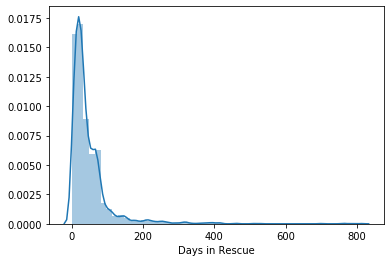

In [55]:
plt.figure()
plt.tight_layout()
sns.distplot(dogs['Days in Rescue'])

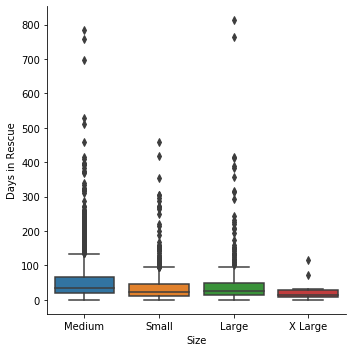

In [56]:
sns.catplot(x="Size", y="Days in Rescue", kind="box", data=dogs);

# Removing Outliers (3 SD's from mean)